# Graphviz example
> An example of graph visualization with Graphviz.

In [1]:
import deetly
from graphviz import Digraph, Graph
import pandas as pd

In [2]:
# Create datapackage
description = """
# Example graph with graphviz
"""

package = {
    "name":"Example graph with graphviz", 
    "description":description, 
    "author":"deetly", 
    "theme":"example",
    "license": "MIT",
    "keyword": ["example, graph, graphviz"]
}

dp = deetly.package(package)

Missing mandatory props(s): ['title']
Missing recommended props(s): ['contactPoint', 'distribution', 'publisher', 'spatial', 'temporal']
Property not in DCAT schema: ['name', 'author', 'license']
Invalid type: ['String:name', 'String:description', 'String:author', 'String or list of strings:theme', 'String:license', 'String or list of strings:keyword', 'ISO date or datetime:issued', 'ISO date or datetime:modified']


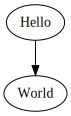

In [3]:
g = Digraph('G')
g.edge('Hello', 'World')
g

In [4]:
dp.graphviz(g.source, "Graphviz Hello World example")

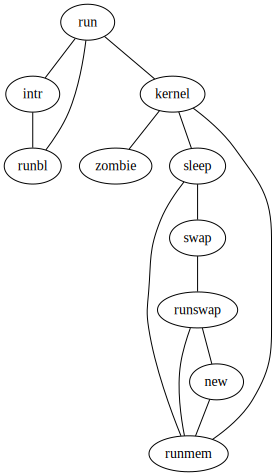

In [5]:
g = Graph()

g.edge('run', 'intr')
g.edge('intr', 'runbl')
g.edge('runbl', 'run')
g.edge('run', 'kernel')
g.edge('kernel', 'zombie')
g.edge('kernel', 'sleep')
g.edge('kernel', 'runmem')
g.edge('sleep', 'swap')
g.edge('swap', 'runswap')
g.edge('runswap', 'new')
g.edge('runswap', 'runmem')
g.edge('new', 'runmem')
g.edge('sleep', 'runmem')

g

In [6]:
dp.graphviz(g.source, "Graphviz process example")

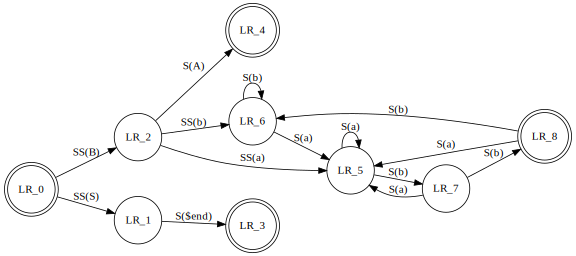

In [7]:
g = Digraph()
g.attr(rankdir='LR', size='8,5')

g.attr('node', shape='doublecircle')
g.node('LR_0')
g.node('LR_3')
g.node('LR_4')
g.node('LR_8')

g.attr('node', shape='circle')
g.edge('LR_0', 'LR_2', label='SS(B)')
g.edge('LR_0', 'LR_1', label='SS(S)')
g.edge('LR_1', 'LR_3', label='S($end)')
g.edge('LR_2', 'LR_6', label='SS(b)')
g.edge('LR_2', 'LR_5', label='SS(a)')
g.edge('LR_2', 'LR_4', label='S(A)')
g.edge('LR_5', 'LR_7', label='S(b)')
g.edge('LR_5', 'LR_5', label='S(a)')
g.edge('LR_6', 'LR_6', label='S(b)')
g.edge('LR_6', 'LR_5', label='S(a)')
g.edge('LR_7', 'LR_8', label='S(b)')
g.edge('LR_7', 'LR_5', label='S(a)')
g.edge('LR_8', 'LR_6', label='S(b)')
g.edge('LR_8', 'LR_5', label='S(a)')

g

In [8]:
dp.graphviz(g.source, "Graphviz finite state machine example")

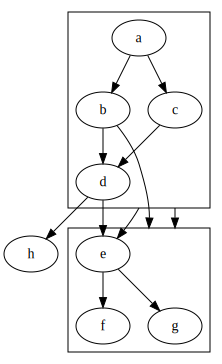

In [9]:
g = Digraph()
g.attr(compound='true')

with g.subgraph(name='cluster0') as c:
    c.edges(['ab', 'ac', 'bd', 'cd'])

with g.subgraph(name='cluster1') as c:
    c.edges(['eg', 'ef'])

g.edge('b', 'f', lhead='cluster1')
g.edge('d', 'e')
g.edge('c', 'g', ltail='cluster0', lhead='cluster1')
g.edge('c', 'e', ltail='cluster0')
g.edge('d', 'h')

g

In [10]:
dp.graphviz(g.source, "Graphviz clustered example")

In [11]:
df_edges = pd.read_csv("https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-all-edges.csv")
df_nodes = pd.read_csv("https://raw.githubusercontent.com/mathbeveridge/asoiaf/master/data/asoiaf-all-nodes.csv")

In [12]:
df_nodes.head(1)

,Id,Label
0,Addam-Marbrand,Addam Marbrand


In [13]:
df_edges.head(1)

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3


In [14]:
df_top_nodes = df_nodes.head(3)
node_list = df_top_nodes["Id"].unique().tolist()

In [15]:
df_top_edges = df_edges[df_edges['Source'].isin(node_list)]

In [16]:
g = Graph()
g.attr(rankdir='LR', size='8,16')

for i in range(len(df_top_edges)):
    edge = df_top_edges.iloc[i]
    g.edge(edge['Source'], edge['Target'])

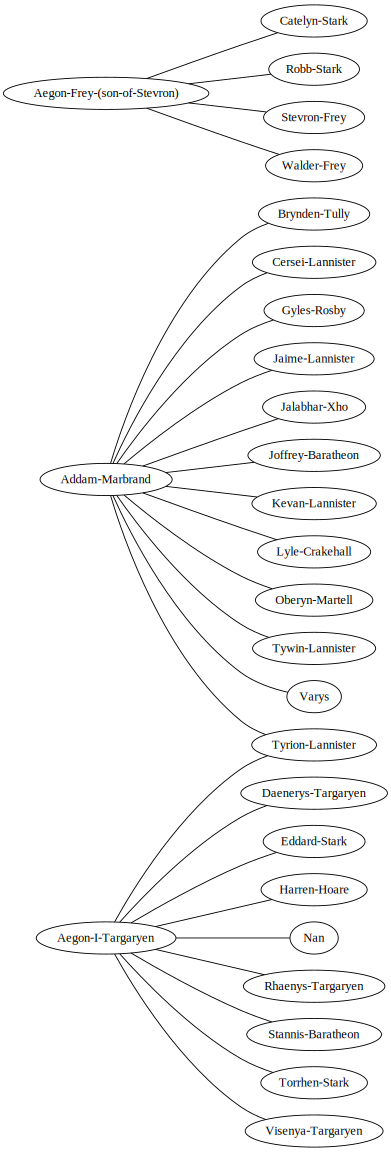

In [17]:
g

In [18]:
dp.graphviz(g.source, "Game of Thrones")

## Publish

In [19]:
dp.publish()

View: https://public.deetly.com/examples/e3c843989f77d7661102716b8fd5478f 

Metadata: https://storage.googleapis.com/deetly/examples/e3c843989f77d7661102716b8fd5478f/datapackage.json 

